# Computer Vision color spaces

### Import statements

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

In [10]:
# Load an image
img_orig = cv2.imread('img/Opener-Farm-To-Table-Gather-Restaurant-Lara-Hata.jpg')
# And make a copy of the original image to avoid manipulating the original image
img_edit = img_orig.copy()


[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [32]:
# Load a color image and split in is different B, G and R channels
B, G, R = cv2.split(img_edit)

[Hint](# "cv2.split") 

In [20]:
# Show each channel channel on screen
B

array([[ 69,  70,  70, ..., 101, 101, 102],
       [ 68,  68,  69, ..., 101, 101, 102],
       [ 66,  66,  67, ..., 101, 102, 102],
       ...,
       [ 46,  44,  44, ...,  82,  78,  75],
       [ 46,  44,  44, ...,  80,  77,  74],
       [ 46,  44,  44, ...,  74,  71,  67]], dtype=uint8)

In [21]:
G

array([[ 59,  60,  60, ..., 101, 101, 102],
       [ 58,  58,  59, ..., 101, 101, 102],
       [ 56,  56,  57, ..., 101, 102, 102],
       ...,
       [ 45,  43,  43, ...,  44,  38,  34],
       [ 45,  43,  43, ...,  40,  35,  31],
       [ 45,  43,  43, ...,  36,  31,  26]], dtype=uint8)

In [37]:
R

array([[ 76,  77,  77, ..., 101, 101, 102],
       [ 75,  75,  76, ..., 101, 101, 102],
       [ 73,  73,  74, ..., 101, 102, 102],
       ...,
       [ 49,  47,  47, ...,  32,  26,  25],
       [ 49,  47,  47, ...,  28,  23,  22],
       [ 49,  47,  47, ...,  24,  19,  17]], dtype=uint8)

#### Merging the color channels

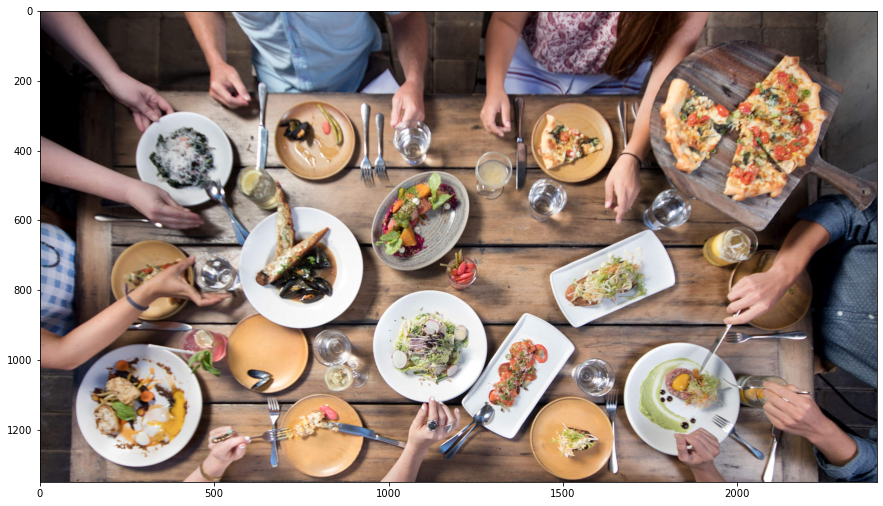

In [38]:
plt.figure(figsize=(15,10))
plt.imshow(img_edit[:,:,[2,1,0]])

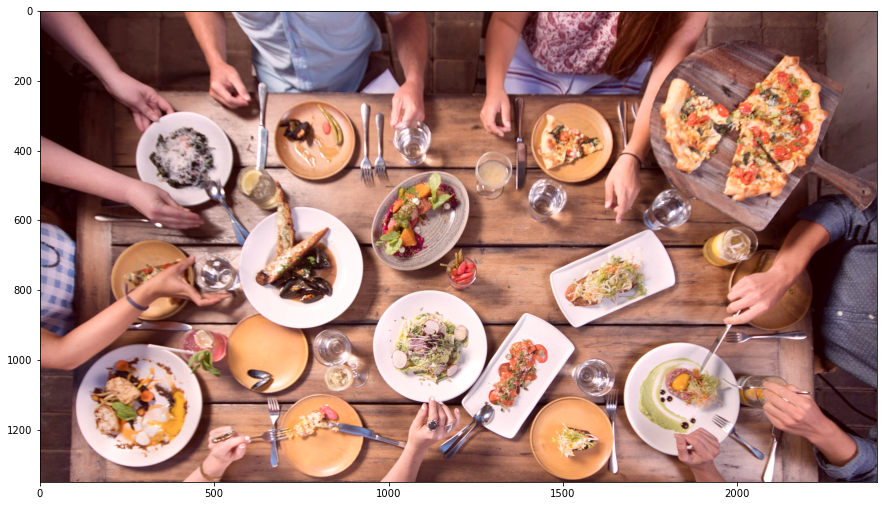

In [42]:
# Modify a channel and then merge them all again
RM = cv2.add(R, 25)
merge_edit = cv2.merge((RM,G,B))
plt.figure(figsize=(15,10))
plt.imshow(merge_edit)

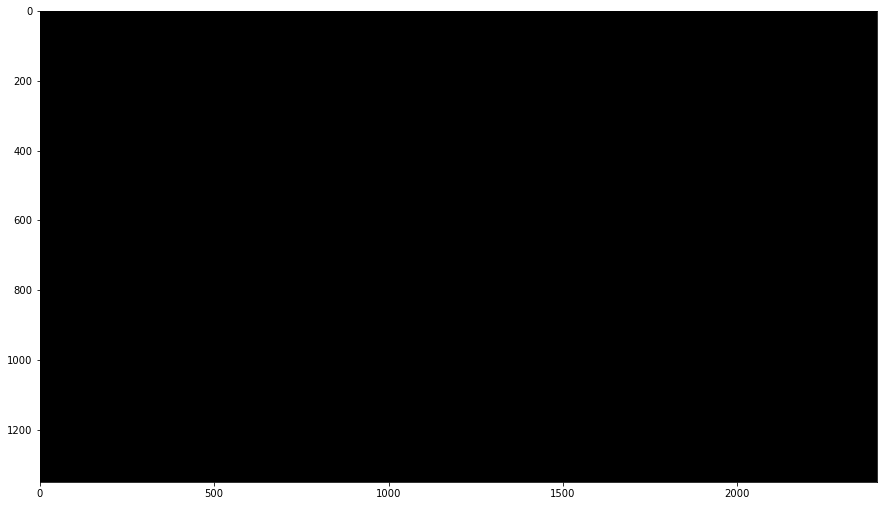

In [50]:
plt.figure(figsize=(15,10))
plt.imshow(CNV_RGB, cmap='gray')

[Hint](# "cv2.merge") 

(1350, 2400)
(1350, 2400)


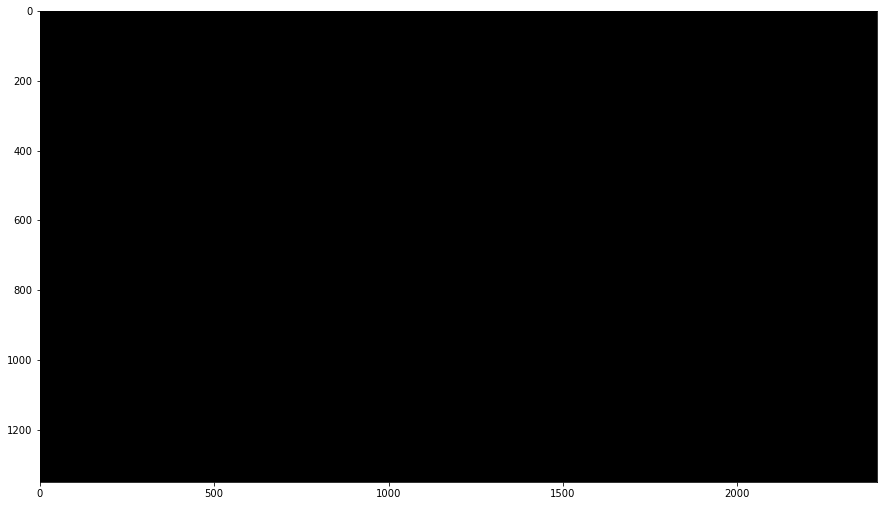

In [55]:
# Create a black canvas with the same size as the image you loaded
CNV = np.zeros(R.shape)
CNV_RGB = cv2.merge((CNV,CNV,CNV))
plt.figure(figsize=(15,10))
plt.imshow(CNV_RGB)
print(CNV.shape)
print(R.shape)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

In [63]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
BLK = cv2.add(R,-255)
RBB = cv2.merge((R,BLK,BLK))
BBB = cv2.merge((BLK,B,BLK))
BBG = cv2.merge((BLK,BLK,G))

CNV_RGB

(1350, 2400) (1350, 2400)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


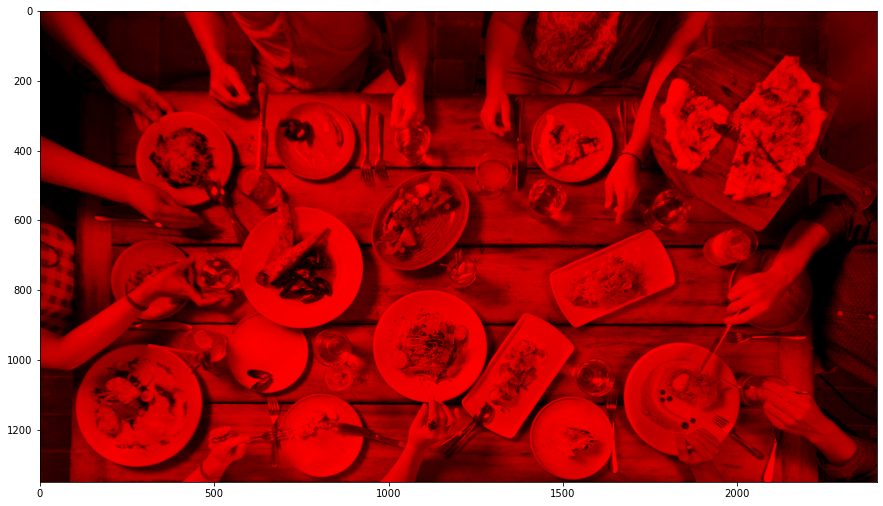

In [65]:
plt.figure(figsize=(15,10))
plt.imshow(RBB)

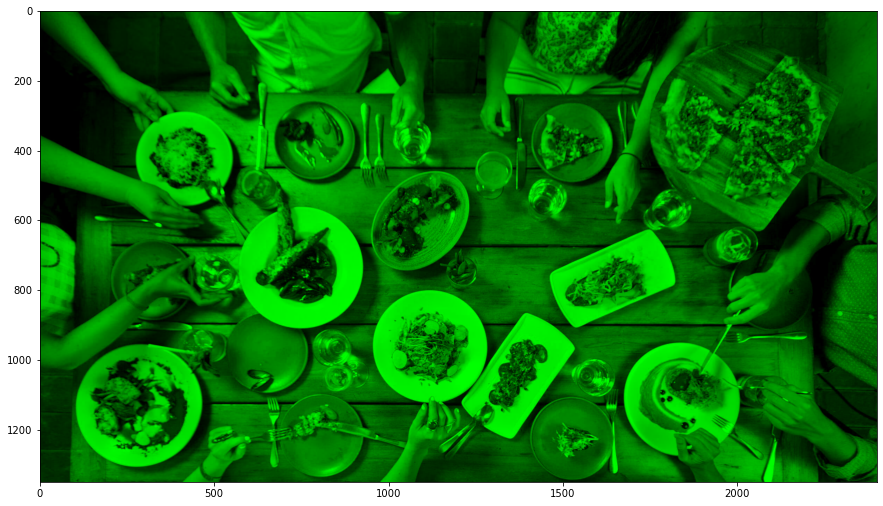

In [66]:
plt.figure(figsize=(15,10))
plt.imshow(BBB)

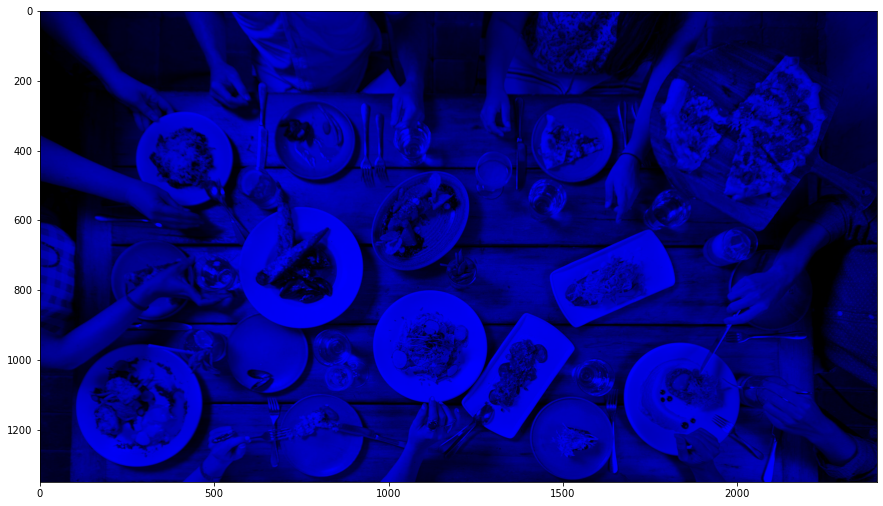

In [64]:
plt.figure(figsize=(15,10))
plt.imshow(BBG)

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

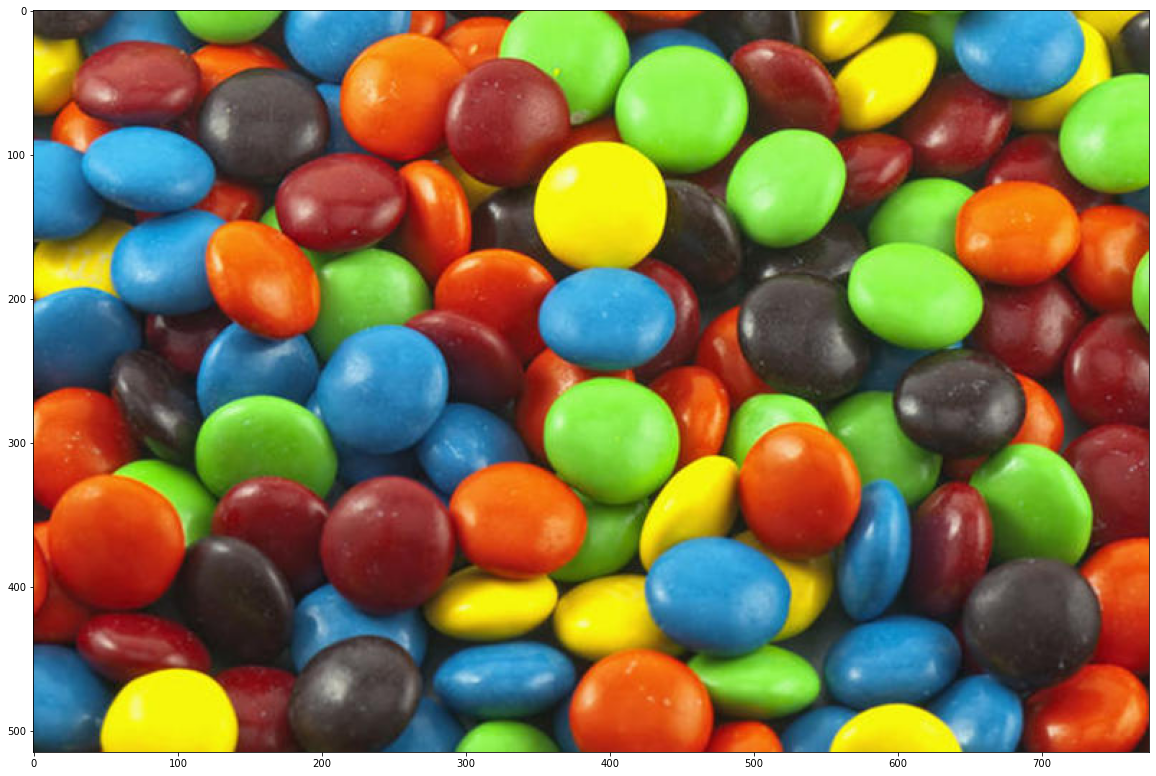

In [4]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));
img_hsv = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(img_hsv)

In [69]:
H

array([[11, 11, 11, ..., 25, 23, 20],
       [13, 13, 11, ..., 23, 22, 19],
       [13, 13, 13, ..., 19, 17, 17],
       ...,
       [92, 95, 93, ...,  6,  6,  5],
       [95, 95, 95, ...,  6,  6,  5],
       [98, 98, 95, ...,  6,  6,  5]], dtype=uint8)

In [70]:
S

array([[ 40,  42,  45, ..., 150, 126, 104],
       [ 47,  49,  46, ..., 133, 101,  83],
       [ 49,  50,  53, ...,  63,  48,  45],
       ...,
       [ 83,  94, 104, ..., 154, 148, 144],
       [ 75,  75,  92, ..., 154, 148, 144],
       [ 68,  67,  71, ..., 154, 148, 144]], dtype=uint8)

In [71]:
V

array([[ 89,  86,  80, ..., 134, 111,  98],
       [ 87,  84,  78, ..., 109,  98,  95],
       [ 84,  81,  77, ...,  97, 101, 107],
       ...,
       [ 46,  49,  49, ...,  48,  50,  53],
       [ 44,  44,  47, ...,  48,  50,  53],
       [ 41,  42,  43, ...,  48,  50,  53]], dtype=uint8)

[Hint](# "cv2.cvtColor") 

In [6]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
img = cv2.imread('img/m.jpg')
img_hsv = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(img_hsv)

lower_blue = np.array([90,40,20])
upper_blue = np.array([140,255,255])
mask = cv2.inRange(img_hsv, lower_blue, upper_blue)
bres = cv2.bitwise_and(img,img, mask= mask)
#cv2.imshow('frame',img)
#cv2.imshow('mask',mask)
cv2.imshow('res',res)


[Hint](# "cv2.inRange") 

In [ ]:
# Repeat the same but now with the greens


In [ ]:
# Now combine both masks togheter so we can see all greens and blues in the same image!


In [ ]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image



[Hint](# "cv2.addWeighted") 

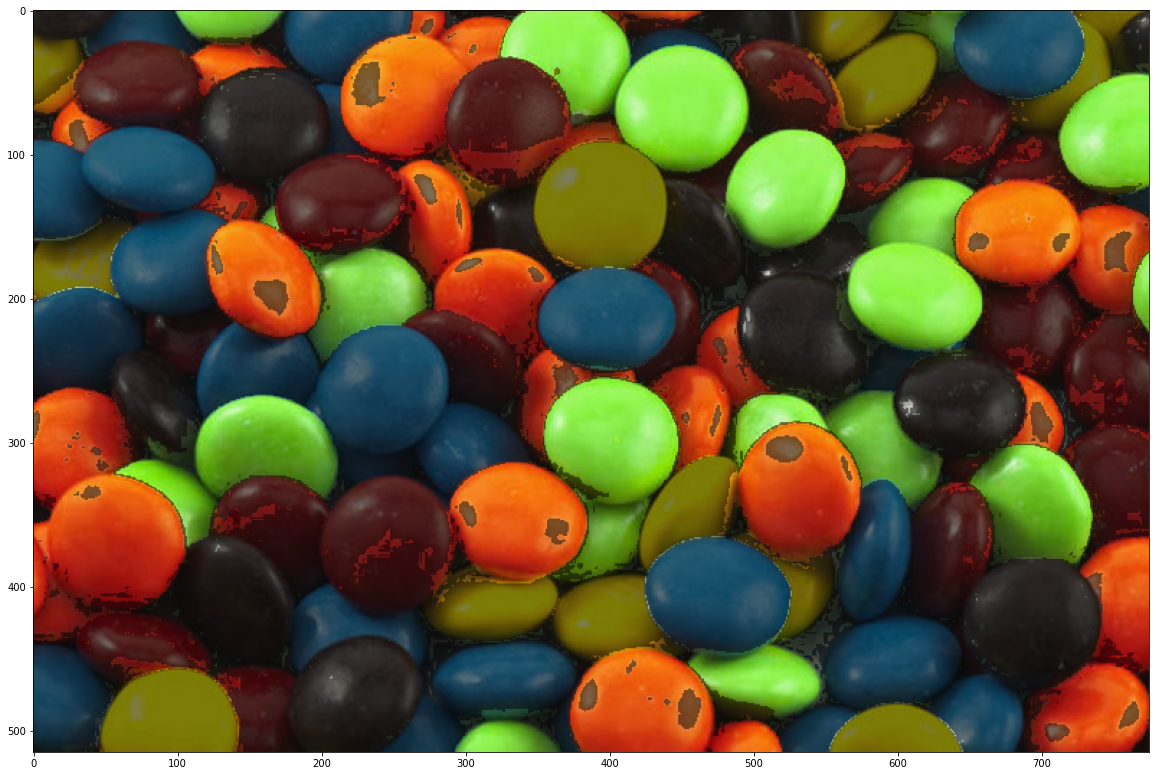

In [9]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?